# MOUNT

In [0]:
#Google Colaboratory
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


function ClickConnect(){
    console.log("코랩 연결 끊김 방지"); 
    document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect, 60 * 1000)

# IMPORT

In [0]:
import os
import gc
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import warnings
warnings.filterwarnings(action='ignore')

root_dir = '/gdrive/My Drive/농사직설/2020 AI Friends Season 1/raw/'

from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, TimeDistributed
from tensorflow.keras.callbacks import LambdaCallback, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# DATA OBSERVATION

In [0]:
root_dir = '/gdrive/My Drive/농사직설/2020 AI Friends Season 1/raw/'
csv_list = os.listdir(root_dir)
csv_list

['sample_submission.csv', 'train.csv', 'test.csv', 'prophet.csv']

In [0]:
train = pd.read_csv(root_dir+ 'train.csv', encoding='utf-8')
test = pd.read_csv(root_dir+ 'test.csv', encoding='utf-8' )

train.tail()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
4747,4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,1007.4,2.5,23.88,95.3,333.1,0.0,274.9,0.0,275.5,0.9,0.0,89.7,10.5,1000.4,1007.5,0.0,0.0,1.2,1006.0,23.8,999.4,89.9,17.7,19.1,1007.5,22.16,218.6,0.0,82.3,58.6,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4748,4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,1007.4,2.5,23.88,95.6,216.4,0.0,277.3,0.0,247.0,1.0,0.0,90.1,10.5,1000.3,1007.5,0.0,0.0,1.3,1006.0,23.6,999.4,91.3,17.7,19.2,1007.5,22.16,161.7,0.0,82.5,59.1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,1007.5,2.5,23.88,95.9,127.8,0.0,256.1,0.0,299.1,0.6,0.0,90.8,10.5,1000.4,1007.6,0.0,0.0,0.2,1006.0,23.6,999.5,90.2,17.8,19.2,1007.5,22.16,254.2,0.0,83.0,58.9,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,1007.5,2.5,23.88,95.9,323.8,0.0,255.1,0.0,0.0,0.6,0.0,91.5,10.5,1000.4,1007.6,0.0,0.0,0.1,1006.0,23.3,999.5,90.1,17.7,19.3,1007.6,22.16,300.0,0.0,83.2,59.8,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4751,4751,19.1,987.6,1.0,0.3,0.0,1006.8,987.8,21.2,1007.5,1007.4,2.5,23.88,96.2,0.0,0.0,237.2,0.0,17.7,0.0,0.0,93.0,10.5,1000.3,1007.6,0.0,0.0,0.1,1006.1,23.2,999.5,89.6,17.7,19.5,1007.7,22.16,157.5,0.0,84.0,59.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0


In [0]:
temperature_name = ["X00","X07","X28","X31","X32"] #기온
localpress_name  = ["X01","X06","X22","X27","X29"] #현지기압
speed_name       = ["X02","X03","X18","X24","X26"] #풍속
water_name       = ["X04","X10","X21","X36","X39"] #일일 누적강수량
press_name       = ["X05","X08","X09","X23","X33"] #해면기압
sun_name         = ["X11","X14","X16","X19","X34"] #일일 누적일사량
humidity_name    = ["X12","X20","X30","X37","X38"] #습도
direction_name   = ["X13","X15","X17","X25","X35"] #풍향

In [0]:
train.set_index('id',drop=True,inplace=True)
test.set_index('id',drop=True,inplace=True)

In [0]:
data_concat=pd.concat([train.loc[:,'X00':'X39'],test.loc[:,'X00':'X39']])
data_concat.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0
3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.0,87.7,0.0,0.0,115.9,0.0,294.1,0.1,0.0,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.0,214.0,0.0,77.5,64.5,0.0
4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.0,88.9,0.0,0.0,124.7,0.0,0.0,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.0,174.9,0.0,78.0,65.0,0.0


In [0]:
plt.figure(figsize = (20, 40))

ax1 = plt.subplot(421)
gp1_1 = sns.lineplot(data = data_concat.loc[71:4751:144, temperature_name])
gp1_2 = sns.lineplot(data = data_concat.loc[4823::144, temperature_name])
plt.title("TEMPERATURE")

ax2 = plt.subplot(422)
gp2_1 = sns.lineplot(data = data_concat.loc[71:4751:144, sun_name])
gp2_2 = sns.lineplot(data = data_concat.loc[4823::144, sun_name])
plt.title("SUN")

ax3 = plt.subplot(423)
gp3_1 = sns.lineplot(data = data_concat.loc[71:4751:144, humidity_name])
gp3_2 = sns.lineplot(data = data_concat.loc[4823::144, humidity_name])
plt.title("HUMIDITY")

ax4 = plt.subplot(424)
gp4_1 = sns.lineplot(data = data_concat.loc[71:4751:144, water_name])
gp4_2 = sns.lineplot(data = data_concat.loc[4823::144, water_name])
plt.title("RAIN")

ax5 = plt.subplot(425)
gp5_1 = sns.lineplot(data = data_concat.loc[71:4751:144, localpress_name])
gp5_2 = sns.lineplot(data = data_concat.loc[4823::144, localpress_name])
plt.title("LOCAL_PRESS")

ax6 = plt.subplot(426)
gp6_1 = sns.lineplot(data = data_concat.loc[71:4751:144, press_name])
gp6_2 = sns.lineplot(data = data_concat.loc[4823::144, press_name])
plt.title("PRESS")

ax7 = plt.subplot(427)
gp7_1 = sns.lineplot(data = data_concat.loc[71:4751:144, speed_name])
gp7_2 = sns.lineplot(data = data_concat.loc[4823::144, speed_name])
plt.title("WIND_SPEED")

ax8 = plt.subplot(428)
gp8_1 = sns.lineplot(data = data_concat.loc[71:4751:144, direction_name])
gp8_2 = sns.lineplot(data = data_concat.loc[4823::144, direction_name])
plt.title("WIND_DIRECTION")

In [0]:
plt.figure(figsize = (20, 40))

ax1 = plt.subplot(421)
gp1 = sns.lineplot(data = train[3888:4320].loc[:, temperature_name])
plt.title("TEMPERATURE")

ax2 = plt.subplot(422)
gp2 = sns.lineplot(data = train[3888:4320].loc[:, sun_name])
plt.title("SUN")

ax3 = plt.subplot(423)
gp3 = sns.lineplot(data = train[3888:4320].loc[:, humidity_name])
plt.title("HUMIDITY")

ax4 = plt.subplot(424)
gp4 = sns.lineplot(data = train[3888:4320].loc[:, water_name])
plt.title("RAIN")

ax5 = plt.subplot(425)
gp5 = sns.lineplot(data = train[3888:4320].loc[:, localpress_name])
plt.title("LOCAL_PRESS")

ax6 = plt.subplot(426)
gp6 = sns.lineplot(data = train[3888:4320].loc[:, press_name])
plt.title("PRESS")

ax7 = plt.subplot(427)
gp7 = sns.lineplot(data = train[3888:4320].loc[:, speed_name])
plt.title("WIND_SPEED")

ax8 = plt.subplot(428)
gp8 = sns.lineplot(data = train[:144].loc[:, direction_name])
plt.title("WIND_DIRECTION")

In [0]:
sensor_names1 = ['Y01','Y02']
sensor_names2 = ['Y03','Y04']
sensor_names3 = ['Y06','Y07']
sensor_names4 = ['Y05','Y12','Y16']
sensor_names5 = ['Y08','Y09','Y17']

control_names=['Y18']

plt.figure(figsize = (20, 15))

ax1 = plt.subplot(321)
gp1 = sns.lineplot(data = train[3888:4320].loc[:, sensor_names1])
plt.title("sensor_names1")

ax2 = plt.subplot(322)
gp2 = sns.lineplot(data = train[3888:4320].loc[:, sensor_names2])
plt.title("sensor_names2")

ax3 = plt.subplot(323)
gp3 = sns.lineplot(data = train[3888:4320].loc[:, sensor_names3])
plt.title("sensor_names3")

ax4 = plt.subplot(324)
gp4 = sns.lineplot(data = train[3888:4320].loc[:, sensor_names4])
plt.title("sensor_names4")

ax5 = plt.subplot(325)
gp5 = sns.lineplot(data = train[3888:4320].loc[:, sensor_names5])
plt.title("sensor_names5")

ax6 = plt.subplot(326)
gp6 = sns.lineplot(data = train[4320:].loc[:, control_names])
plt.title("control_names")

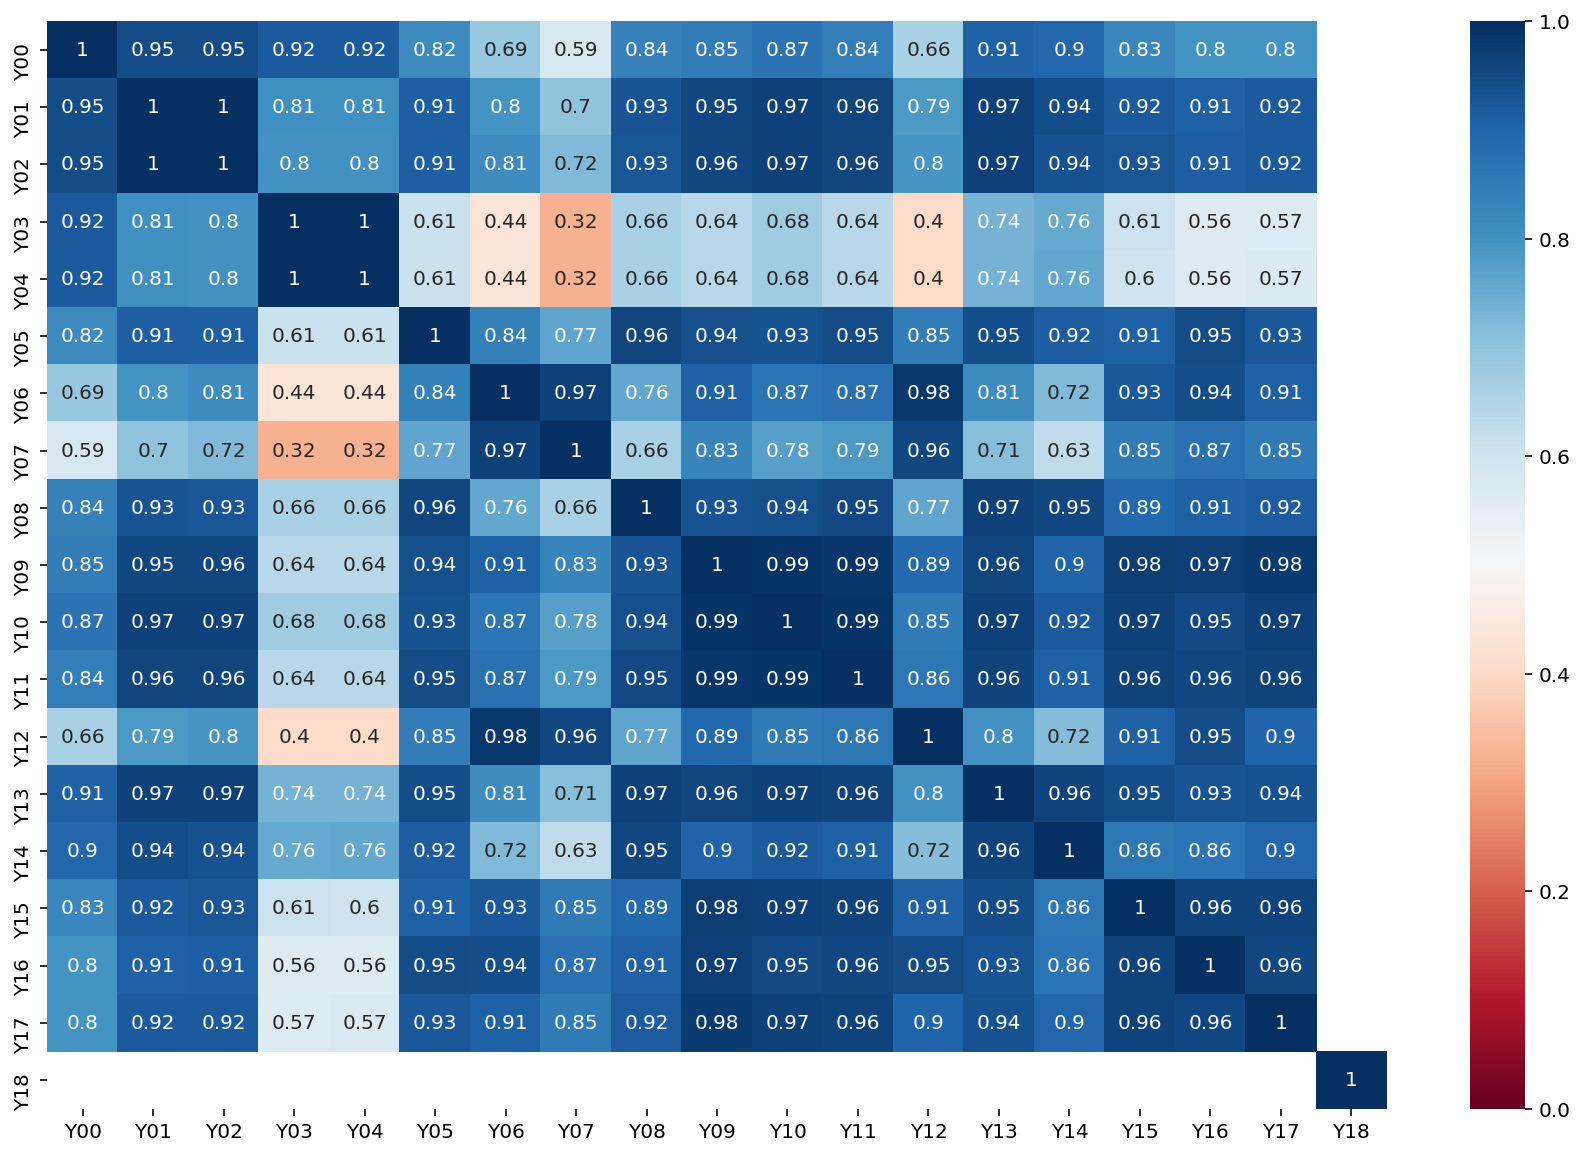

In [0]:
#상관계수 히트맵

train_corr = train.loc[:,"Y00":"Y18"].corr()
plt.figure(figsize=(15,10))
ax = sns.heatmap(train_corr, cmap = "RdBu", annot = True,vmin=0, vmax=1)
ax.set_ylim(len(train_corr.columns),0)
plt.show()

# DATA PROCESSING

In [0]:
#데이터 읽기

train = pd.read_csv(root_dir+ 'train.csv')
test = pd.read_csv(root_dir+ 'test.csv')

ERROR! Session/line number was not unique in database. History logging moved to new session 59


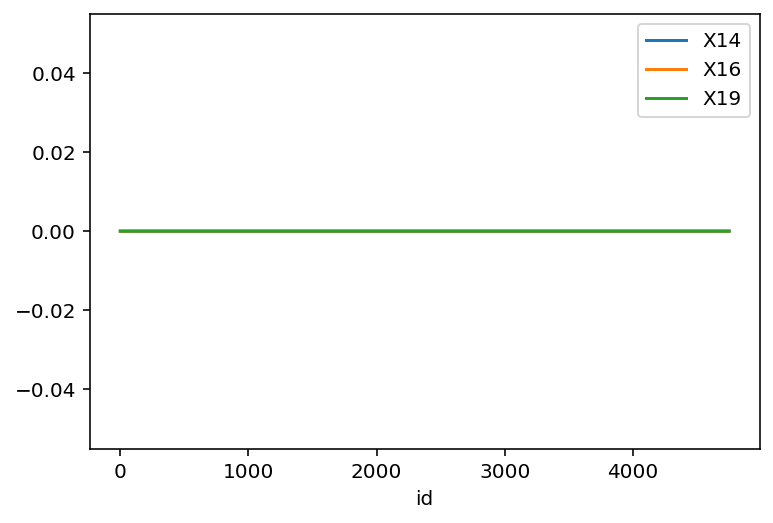

In [0]:
#고장난 센서 제거

train.plot(x = "id", y = train.columns[train.max() == train.min()])
plt.show()

def same_min_max(df):
    return df.drop(df.columns[df.max() == df.min()], axis=1)

train = same_min_max(train)
test  = same_min_max(test)

In [0]:
#표준화

#정규화 함수
def standardization(df):
    mean = np.mean(df)
    std = np.std(df)
    norm = (df - mean) / (std - 1e-07)
    return norm, mean, std

X_name = train.loc[:,"X00":"X39"].columns

train_X_norm, mean, std = standardization(train[X_name])
test_X_norm = (test[X_name] - mean) / (std - 1e-07)

#표준화된 X들과 id컬럼 병합
train2 = pd.concat([train["id"], train_X_norm], axis=1) 
test2  = pd.concat([test["id"] , test_X_norm] , axis=1)

print(train2.shape, test2.shape)
test2.head()

(4752, 41) (11520, 41)


,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,4752,-0.324597,-0.363472,-0.009111,-0.163620,-0.286772,-0.451855,-0.383472,-0.127510,-0.366580,-0.336784,-0.302862,-1.012516,1.252044,1.743749,-0.0,0.258279,-0.0,-1.085332,-0.240247,-0.0,1.063816,-0.279106,-0.437489,-0.366078,-0.902731,-1.061634,-1.023467,-0.451211,0.265331,-0.387018,1.196016,-0.425120,-0.154235,-0.428667,-1.015988,-0.137597,-0.274975,0.926050,0.093720,-0.234601
1,4753,-0.303353,-0.363472,-0.382334,-0.270451,-0.286772,-0.481312,-0.383472,-0.104662,-0.366580,-0.336784,-0.302862,-1.012516,1.256533,1.762984,-0.0,0.201005,-0.0,-0.294346,-0.673184,-0.0,1.091303,-0.279106,-0.467185,-0.395341,-0.902731,-1.061634,-0.862277,-0.480229,0.241661,-0.416518,1.205308,-0.443237,-0.173206,-0.457735,-1.015988,-0.354529,-0.274975,0.926050,0.126389,-0.234601
2,4754,-0.260864,-0.363472,-0.195722,-0.270451,-0.286772,-0.510770,-0.412855,-0.104662,-0.394989,-0.336784,-0.302862,-1.012516,1.265512,-1.633554,-0.0,-0.014796,-0.0,-0.886939,-1.192709,-0.0,1.027166,-0.279106,-0.496882,-0.424604,-0.902731,-1.061634,-0.539896,-0.480229,0.241661,-0.446017,1.223892,-0.479471,-0.192178,-0.457735,-1.015988,0.002004,-0.274975,0.977266,0.142723,-0.234601
3,4755,-0.324597,-0.363472,0.737335,-0.697778,-0.286772,-0.510770,-0.412855,-0.127510,-0.394989,-0.336784,-0.302862,-1.012516,1.270001,0.926757,-0.0,-0.213209,-0.0,-0.922305,-0.846359,-0.0,1.050072,-0.279106,-0.496882,-0.424604,-0.902731,-1.061634,-0.620491,-0.509248,0.170651,-0.446017,1.270353,-0.479471,-0.230121,-0.486802,-1.015988,-0.235015,-0.274975,1.018239,0.164502,-0.234601
4,4756,-0.388331,-0.363472,-0.382334,-0.804610,-0.286772,-0.481312,-0.383472,-0.173206,-0.366580,-0.336784,-0.302862,-1.012516,1.274490,0.777937,-0.0,-0.005591,-0.0,-0.974922,-0.500009,-0.0,1.109628,-0.279106,-0.467185,-0.453867,-0.902731,-1.061634,-0.539896,-0.480229,0.170651,-0.475517,1.237830,-0.443237,-0.211149,-0.457735,-1.015988,-0.457974,-0.274975,1.095063,0.191725,-0.234601


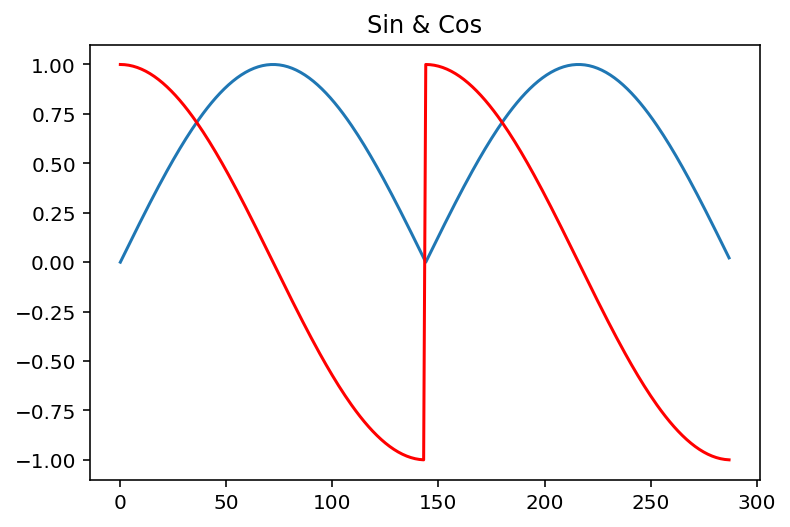

In [0]:
#시간 부여

minute = (train.id%144).astype(int)
hour= pd.Series((train.index%144/6).astype(int))

min_in_day = 24*6
hour_in_day = 24

minute_sin = np.sin(np.pi*minute/min_in_day) 
minute_cos = np.cos(np.pi*minute/min_in_day)

hour_sin  = np.sin(np.pi*hour/hour_in_day)
hour_cos  = np.cos(np.pi*hour/hour_in_day)

t1 = range(len(minute_sin[:288]))
plt.plot(t1, minute_sin[:288], 
         t1, minute_cos[:288], 'r-')
plt.title("Sin & Cos")
plt.show()

In [0]:
cols = list(train.columns[-19:-1])

flist = [] 
plist = []
nlist = []

while cols:
  col1=cols.pop(0)
  for col2 in cols:
    lresult = stats.levene(train.loc[:4319,col1], train.loc[:4319,col2])
    flist.append(round(lresult[0], 4))
    plist.append(round(lresult[1], 4))
    nlist.append(str(col1)+'&'+str(col2))

cols = list(train.columns[-19:-1])

summary = pd.DataFrame()
summary['cols'] = nlist
summary['Fstat'] = flist
summary['FP-value'] = plist
summary['등분산'] = summary['FP-value'].apply(lambda x: '이분산' if x < 0.05 else '등분산')
summary['Tstat'] = 0
summary['TP-value'] = 0
summary['Tresult'] = 0

while cols:
  col1=cols.pop(0)
  for col2 in cols:
    if bool(summary[summary['cols']==str(col1)+'&'+str(col2)]['등분산'].values=='등분산'):
        ttest_result = stats.ttest_ind(train[col1], train[col2], equal_var = True)
        summary.loc[summary['cols'] == str(col1)+'&'+str(col2), 'Tstat'] = ttest_result[0]
        summary.loc[summary['cols'] == str(col1)+'&'+str(col2), 'TP-value'] = ttest_result[1]
        if round(ttest_result[1], 4) < 0.05:
            summary.loc[summary['cols'] == str(col1)+'&'+str(col2), 'Tresult'] = '차이가 있다'
        else:
            summary.loc[summary['cols'] == str(col1)+'&'+str(col2), 'Tresult'] = '차이가 없다'
    else:
        ttest_result = stats.ttest_ind(train[col1], train[col2], equal_var = False)
        summary.loc[summary['cols'] == str(col1)+'&'+str(col2), 'Tstat'] = ttest_result[0]
        summary.loc[summary['cols'] == str(col1)+'&'+str(col2), 'TP-value'] = ttest_result[1]
        if round(ttest_result[1], 4) < 0.05:
            summary.loc[summary['cols'] == str(col1)+'&'+str(col2), 'Tresult'] = '차이가 있다'
        else:
            summary.loc[summary['cols'] == str(col1)+'&'+str(col2), 'Tresult'] = '차이가 없다'

summary[lambda x:x['등분산']=='등분산']

,cols,Fstat,FP-value,등분산,Tstat,TP-value,Tresult
17,Y01&Y02,1.0402,0.3078,등분산,NaN,NaN,차이가 없다
21,Y01&Y06,1.2516,0.2633,등분산,NaN,NaN,차이가 없다
36,Y02&Y06,0.0115,0.9145,등분산,NaN,NaN,차이가 없다
48,Y03&Y04,1.5467,0.2137,등분산,NaN,NaN,차이가 없다
76,Y05&Y07,0.8031,0.3702,등분산,NaN,NaN,차이가 없다
85,Y05&Y16,0.2126,0.6447,등분산,NaN,NaN,차이가 없다
102,Y07&Y12,2.7003,0.1004,등분산,NaN,NaN,차이가 없다
106,Y07&Y16,0.2908,0.5897,등분산,NaN,NaN,차이가 없다
108,Y08&Y09,2.2825,0.1309,등분산,NaN,NaN,차이가 없다
116,Y08&Y17,1.6240,0.2026,등분산,NaN,NaN,차이가 없다


# Model (BASIC)

In [0]:
def mse_AIFrenz(y_true, y_pred):
    '''
    y_true: 실제 값
    y_pred: 예측 값
    '''
    diff = abs(y_true - y_pred)
    
    less_then_one = np.where(diff < 1, 0, diff)
    
    # multi-column일 경우에도 계산 할 수 있도록 np.average를 한번 더 씌움
    score = np.average(np.average(less_then_one ** 2, axis = 0))
    
    return score

In [0]:
X = train.loc[4320:4752,'X00':'X39']
y = train.loc[4320:4752,'Y18']

lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
print(len(X_train), len(X_test))

324 108


In [0]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [0]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [0]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

[07:26:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

In [0]:
model_names=['rf','dt','xgb','lgbm','answer','rf_score','dt_score','xgb_score','lgbm_score']

result=pd.DataFrame()
result.colums=model_names
result['rf']=rf_pred
result['dt']=dt_pred
result['xgb']=xgb_pred
result['lgbm']=lgbm_pred
result['answer']=y_test
result['rf_score']=mse_AIFrenz(result['answer'],result['rf'])
result['dt_score']=mse_AIFrenz(result['answer'],result['dt'])
result['xgb_score']=mse_AIFrenz(result['answer'],result['xgb'])
result['lgbm_score']=mse_AIFrenz(result['answer'],result['lgbm'])
result.head()

,rf,dt,xgb,lgbm,answer,rf_score,dt_score,xgb_score,lgbm_score
0,4.01,4.0,4.169456,4.017176,4,2.062933,5.277778,1.326221,1.882098
1,27.50,28.0,27.420975,27.944223,28,2.062933,5.277778,1.326221,1.882098
2,37.33,35.0,36.782398,38.575117,35,2.062933,5.277778,1.326221,1.882098
3,4.51,4.0,4.438875,4.465040,4,2.062933,5.277778,1.326221,1.882098
4,21.16,19.0,20.548870,20.144622,21,2.062933,5.277778,1.326221,1.882098


# MODEL (LGBM)

In [0]:
temperature_name = ["X00","X07","X28","X31","X32"] #기온
localpress_name  = ["X01","X06","X22","X27","X29"] #현지기압
speed_name       = ["X02","X03","X18","X24","X26"] #풍속
water_name       = ["X04","X10","X21","X36","X39"] #일일 누적강수량
press_name       = ["X05","X08","X09","X23","X33"] #해면기압
sun_name         = ["X11","X14","X16","X19","X34"] #일일 누적일사량
humidity_name    = ["X12","X20","X30","X37","X38"] #습도
direction_name   = ["X13","X15","X17","X25","X35"] #풍향

In [0]:
#데이터 읽기
root_dir = '/gdrive/My Drive/농사직설/2020 AI Friends Season 1/raw/'

train = pd.read_csv(root_dir+ 'filled_train.csv')
test = pd.read_csv(root_dir+ 'test.csv')

train_columns=train.columns.tolist()
test_columns=test.columns.tolist()

temp = train["Y18"].isna()
null_index = temp[temp==True].index
train.loc[null_index, "Y18"] = train.loc[null_index, "Y00":"Y17"].mean(axis=1)
dataY = train.loc[:, "Y18"]

train = pd.DataFrame(scaler.fit_transform(train), columns=train_columns)
test = pd.DataFrame(scaler.fit_transform(test), columns=test_columns)

train_drop_columns=['X14','X16','X19']+direction_name
test_drop_columns=['id','X14','X16','X19']+direction_name

train.drop(train_drop_columns,axis=1,inplace=True)
test.drop(test_drop_columns,axis=1,inplace=True)

dataX = train.loc[:, "X00":"X39"]
testX = test.loc[:, "X00":"X39"]

train_size=int(len(dataX)*0.7)

X_train = np.array(dataX[0:train_size])
y_train = np.array(dataY[0:train_size])
X_test = np.array(dataX[train_size:len(dataX)])
y_test = np.array(dataY[train_size:len(dataY)])

In [0]:
lgb = LGBMRegressor(n_jobs=-1,random_state=42)

#######
boosting_type = ['gbdt']
n_estimators = [1000*i for i in range(2, 6)]
learning_rate = [0.01*i for i in range(1,11)]
max_depth = [-1]
colsample_bytree = [1.0]
metric = ['l1','l2','rmse','mape','gamma']

parameters = {'boosting_type' : boosting_type,
                       'n_estimators' : n_estimators,
                       'learning_rate' : learning_rate,
                       'colsample_bytree' : colsample_bytree,
                       'max_depth' : max_depth,
                       'metric' : metric}

lgb_grid = GridSearchCV(estimator=lgb, param_grid = parameters, scoring='neg_mean_squared_error', cv = 5, n_jobs=-1, verbose=1)

lgb_grid.fit(dataX,dataY)
lgb_pred=lgb_grid.predict(testX)
print(lgb_grid.best_params_)

submission=pd.DataFrame(lgb_pred)
submission.to_csv('/gdrive/My Drive/농사직설/2020 AI Friends Season 1/csv/lgb.csv')
submission.head()

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 30.8min


In [0]:
submission.describe()

,0
count,11520.000000
mean,25.938523
std,4.721037
min,18.881598
25%,22.565540
50%,23.977230
75%,29.058831
max,40.380154


# MODEL (XGB)

In [0]:
temperature_name = ["X00","X07","X28","X31","X32"] #기온
localpress_name  = ["X01","X06","X22","X27","X29"] #현지기압
speed_name       = ["X02","X03","X18","X24","X26"] #풍속
water_name       = ["X04","X10","X21","X36","X39"] #일일 누적강수량
press_name       = ["X05","X08","X09","X23","X33"] #해면기압
sun_name         = ["X11","X14","X16","X19","X34"] #일일 누적일사량
humidity_name    = ["X12","X20","X30","X37","X38"] #습도
direction_name   = ["X13","X15","X17","X25","X35"] #풍향

In [0]:
#데이터 읽기
root_dir = '/gdrive/My Drive/농사직설/2020 AI Friends Season 1/raw/'

train = pd.read_csv(root_dir+ 'filled_train.csv')
test = pd.read_csv(root_dir+ 'test.csv')

train_columns=train.columns.tolist()
test_columns=test.columns.tolist()

temp = train["Y18"].isna()
null_index = temp[temp==True].index
train.loc[null_index, "Y18"] = train.loc[null_index, "Y00":"Y17"].mean(axis=1)
dataY = train.loc[:, "Y18"]

train = pd.DataFrame(scaler.fit_transform(train), columns=train_columns)
test = pd.DataFrame(scaler.fit_transform(test), columns=test_columns)

train_drop_columns=['X14','X16','X19']+direction_name
test_drop_columns=['id','X14','X16','X19']+direction_name

train.drop(train_drop_columns,axis=1,inplace=True)
test.drop(test_drop_columns,axis=1,inplace=True)

dataX = train.loc[:, "X00":"X39"]
testX = test.loc[:, "X00":"X39"]

train_size=int(len(dataX)*0.7)

X_train = np.array(dataX[0:train_size])
y_train = np.array(dataY[0:train_size])
X_test = np.array(dataX[train_size:len(dataX)])
y_test = np.array(dataY[train_size:len(dataY)])

In [0]:
xgb = XGBRegressor(n_jobs=-1,random_state=42)

#####
boosting_type = ['gbdt','dart']
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 4000, num = 4)]
learning_rate = [0.01 * i for i in range(1,11)]
num_leaves = [int(i)+1 for i in np.linspace(10, 110, num=6)]
max_bin = [int(i) for i in np.linspace(2, 12, num=6)]
min_split_gain = [0.0, 0.01]
colsample_bytree = [0.1 * i for i in range(6,11)]
metric = ['l1','l2','rmse','mape','gamma']

parameters ={
    'learning_rate': learning_rate,
    'silent': [True],
    'n_estimators':n_estimators,
    'refit' : [True],
    'metric' : metric
}

xgb_grid = GridSearchCV(estimator=xgb, param_grid = parameters, scoring='neg_mean_squared_error', cv = 5, n_jobs=-1, verbose=1)

xgb_grid.fit(dataX,dataY)
xgb_pred=xgb_grid.predict(testX)
print(xgb_grid.best_params_)

submission=pd.DataFrame(xgb_pred)
submission.to_csv('/gdrive/My Drive/농사직설/2020 AI Friends Season 1/csv/xgb.csv')
submission.head()

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 50.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 63.8min finished


{'learning_rate': 0.05, 'metric': 'l1', 'n_estimators': 4000, 'refit': True, 'silent': True}


,0
0,20.868942
1,20.800697
2,21.056318
3,20.853096
4,20.756250


In [0]:
submission.describe()

,0
count,11520.000000
mean,25.943335
std,4.780472
min,18.552824
25%,22.423446
50%,24.307514
75%,29.117374
max,40.897354


# MODEL (LSTM)

In [0]:
temperature_name = ["X00","X07","X28","X31","X32"] #기온
localpress_name  = ["X01","X06","X22","X27","X29"] #현지기압
speed_name       = ["X02","X03","X18","X24","X26"] #풍속
water_name       = ["X04","X10","X21","X36","X39"] #일일 누적강수량
press_name       = ["X05","X08","X09","X23","X33"] #해면기압
sun_name         = ["X11","X14","X16","X19","X34"] #일일 누적일사량
humidity_name    = ["X12","X20","X30","X37","X38"] #습도
direction_name   = ["X13","X15","X17","X25","X35"] #풍향

In [0]:
#데이터 읽기

train = pd.read_csv(root_dir+ 'train.csv')
test = pd.read_csv(root_dir+ 'test.csv')

train_columns=train.columns.tolist()
test_columns=test.columns.tolist()

temp = train["Y18"].isna()
null_index = temp[temp==True].index
train.loc[null_index, "Y18"] = train.loc[null_index, "Y00":"Y17"].mean(axis=1)
y_train = train.loc[:, "Y18"]

train = pd.DataFrame(scaler.fit_transform(train), columns=train_columns)
test = pd.DataFrame(scaler.fit_transform(test), columns=test_columns)

drop_columns=['id','X14','X16','X19']+direction_name+press_name

train.drop(drop_columns,axis=1,inplace=True)
test.drop(drop_columns,axis=1,inplace=True)

X_train = train.loc[:, "X00":"X39"]

In [0]:
test.head()

,X00,X01,X02,X03,X04,X06,X07,X10,X11,X12,X18,X20,X21,X22,X24,X26,X27,X28,X29,X30,X31,X32,X34,X36,X37,X38,X39
0,0.153846,0.615108,0.136364,0.119266,0.0,0.602941,0.203209,0.0,0.0,0.962644,0.106796,0.952872,0.0,0.599278,0.0,0.008403,0.603636,0.252809,0.608696,0.918768,0.156398,0.198068,0.0,0.0,0.815296,0.507524,0.0
1,0.158654,0.615108,0.100000,0.110092,0.0,0.602941,0.208556,0.0,0.0,0.964080,0.058252,0.961708,0.0,0.595668,0.0,0.025210,0.600000,0.247191,0.605072,0.921569,0.151659,0.193237,0.0,0.0,0.815296,0.515732,0.0
2,0.168269,0.615108,0.118182,0.110092,0.0,0.599265,0.208556,0.0,0.0,0.966954,0.000000,0.941090,0.0,0.592058,0.0,0.058824,0.600000,0.247191,0.601449,0.927171,0.142180,0.188406,0.0,0.0,0.829726,0.519836,0.0
3,0.153846,0.615108,0.209091,0.073394,0.0,0.599265,0.203209,0.0,0.0,0.968391,0.038835,0.948454,0.0,0.592058,0.0,0.050420,0.596364,0.230337,0.601449,0.941176,0.142180,0.178744,0.0,0.0,0.841270,0.525308,0.0
4,0.139423,0.615108,0.100000,0.064220,0.0,0.602941,0.192513,0.0,0.0,0.969828,0.077670,0.967599,0.0,0.595668,0.0,0.058824,0.600000,0.230337,0.597826,0.931373,0.151659,0.183575,0.0,0.0,0.862915,0.532148,0.0


In [0]:
seq_length=144
data_dim=len(test.columns.tolist())
output_dim=1

In [0]:
dataX=[]
dataY=[]

for i in range(0, len(X_train)-seq_length):
  _x = np.array(X_train[i:i+seq_length])
  _y = [np.array(y_train[i+seq_length])]
  dataX.append(_x)
  dataY.append(_y)

print(dataX[0])
print(dataY[0])

[[0.0619469  0.57788945 0.11764706 ... 0.74346202 0.58127438 0.        ]
 [0.04424779 0.58291457 0.16666667 ... 0.74470735 0.59297789 0.        ]
 [0.04867257 0.5879397  0.10784314 ... 0.74470735 0.59817945 0.        ]
 ...
 [0.22566372 0.47738693 0.28431373 ... 0.58405978 0.51235371 0.        ]
 [0.21238938 0.47738693 0.16666667 ... 0.5890411  0.52015605 0.        ]
 [0.19911504 0.48743719 0.26470588 ... 0.59900374 0.53055917 0.        ]]
[array(14.91666667)]


In [0]:
#train_size=int(len(dataY)*0.7)
train_size=4320

X_train = np.array(dataX[0:train_size])
y_train = np.array(dataY[0:train_size])
X_test = np.array(dataX[train_size:len(dataX)])
y_test = np.array(dataY[train_size:len(dataY)])

#X_train=tf.reshape(X_train, (train_size, 6, 40))
#y_train=tf.reshape(y_train, (train_size, 6, 1))
#X_test=tf.reshape(X_test, (len(dataY)-train_size, 6, 40))
#y_test=tf.reshape(y_test, (len(dataY)-train_size, 6, 1))

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3)
#X_train = np.array(X_train)
#X_test = np.array(X_test)
#y_train = np.array(y_train)
#y_test = np.array(y_test)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(X_train[0].shape)
print(y_train[0].shape)
print(X_train[0])
print(y_train[0])

(4320, 144, 27)
(4320, 1)
(288, 144, 27)
(288, 1)
(144, 27)
(1,)
[[0.0619469  0.57788945 0.11764706 ... 0.74346202 0.58127438 0.        ]
 [0.04424779 0.58291457 0.16666667 ... 0.74470735 0.59297789 0.        ]
 [0.04867257 0.5879397  0.10784314 ... 0.74470735 0.59817945 0.        ]
 ...
 [0.22566372 0.47738693 0.28431373 ... 0.58405978 0.51235371 0.        ]
 [0.21238938 0.47738693 0.16666667 ... 0.5890411  0.52015605 0.        ]
 [0.19911504 0.48743719 0.26470588 ... 0.59900374 0.53055917 0.        ]]
[14.91666667]


In [0]:
# callback 설정
filename = 'checkpoint-epoch-{}-batch-{}-trial-001.h5'.format(EPOCHS, BATCH_SIZE)

checkpoint = ModelCheckpoint(filename,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='auto')

earlystopping = EarlyStopping(monitor='val_loss',
                              patience=10)

In [0]:
EPOCHS = 1000
BATCH_SIZE=128

model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, data_dim)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

opt = Adam(lr=0.001, decay=1e-6)

model.compile(loss='mean_squared_error',optimizer=opt,metrics=['mse', 'mae', 'mape'])

model.summary()

model.fit(X_train, y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=False,
          validation_data=(X_test, y_test),callbacks=[checkpoint, earlystopping],  
          verbose = 1)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 128)               79872     
_________________________________________________________________
dense_42 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_43 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 17        
Total params: 84,545
Trainable params: 84,545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
33/34 [============================>.] - ETA: 0s - loss: 286.0493 - mse: 286.0493 - mae: 14.3332 - mape: 59.2802
Epoch 00001: val_loss did not improve from 4.68095
34/34 [==============================] - 2s 49ms/step - loss: 280.3362

In [0]:
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
score

3/3 [==============================] - 0s 8ms/step - loss: 5.7728 - mse: 7.6359 - mae: 1.8104 - mape: 5.6579


[5.772794723510742, 7.635936260223389, 1.8103697299957275, 5.657902240753174]

In [0]:
model.fit(np.array(dataX), np.array(dataY),
          batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=False)

Epoch 1/1000
36/36 [==============================] - 1s 32ms/step - loss: 5.9621 - mse: 5.9621 - mae: 1.8620 - mape: 8.0701
Epoch 2/1000
36/36 [==============================] - 1s 32ms/step - loss: 6.1685 - mse: 6.1685 - mae: 1.8806 - mape: 8.1581
Epoch 3/1000
36/36 [==============================] - 1s 32ms/step - loss: 5.7794 - mse: 5.7794 - mae: 1.8186 - mape: 7.8680
Epoch 4/1000
36/36 [==============================] - 1s 32ms/step - loss: 5.5571 - mse: 5.5571 - mae: 1.7969 - mape: 7.8037
Epoch 5/1000
36/36 [==============================] - 1s 32ms/step - loss: 5.3941 - mse: 5.3941 - mae: 1.7764 - mape: 7.7271
Epoch 6/1000
36/36 [==============================] - 1s 32ms/step - loss: 5.1620 - mse: 5.1620 - mae: 1.7355 - mape: 7.5643
Epoch 7/1000
36/36 [==============================] - 1s 32ms/step - loss: 4.8058 - mse: 4.8058 - mae: 1.6583 - mape: 7.1793
Epoch 8/1000
36/36 [==============================] - 1s 32ms/step - loss: 4.6307 - mse: 4.6307 - mae: 1.6200 - mape: 6.9856


In [0]:
test_list=[]

for i in range(0, len(test)-seq_length):
  _x = np.array(test[i:i+seq_length])
  test_list.append(_x)
test_np=np.array(test_list)
print(test_np[0])
print(test_np.shape)

[[0.15384615 0.61510791 0.13636364 ... 0.81529582 0.50752394 0.        ]
 [0.15865385 0.61510791 0.1        ... 0.81529582 0.51573187 0.        ]
 [0.16826923 0.61510791 0.11818182 ... 0.82972583 0.51983584 0.        ]
 ...
 [0.18269231 0.68705036 0.02727273 ... 0.4963925  0.3119015  0.        ]
 [0.19230769 0.69064748 0.08181818 ... 0.5007215  0.29822161 0.        ]
 [0.1875     0.69064748 0.05454545 ... 0.50793651 0.30506156 0.        ]]
(11376, 144, 27)


In [0]:
submission=model.predict(test_np)

submission=pd.DataFrame(submission)
submission.to_csv('/gdrive/My Drive/농사직설/2020 AI Friends Season 1/lstm.csv')
submission

,0
0,11.765951
1,11.325933
2,11.214603
3,10.863146
4,10.625170
5,10.526749
6,10.451307
7,10.298508
8,10.142664
9,10.085674


In [0]:
submission.describe()

,0
count,11376.000000
mean,20.656115
std,6.060153
min,8.031271
25%,16.093253
50%,19.731374
75%,25.050599
max,39.442646


# MODEL (SVR)

In [0]:
#데이터 읽기
root_dir = '/gdrive/My Drive/농사직설/2020 AI Friends Season 1/raw/'

train = pd.read_csv(root_dir+ 'train.csv')
test = pd.read_csv(root_dir+ 'test.csv')

train_columns=train.columns.tolist()
test_columns=test.columns.tolist()

temp = train["Y18"].isna()
null_index = temp[temp==True].index
train.loc[null_index, "Y18"] = train.loc[null_index, "Y00":"Y17"].mean(axis=1)
dataY = train.loc[:, "Y18"]

train = pd.DataFrame(scaler.fit_transform(train), columns=train_columns)
test = pd.DataFrame(scaler.fit_transform(test), columns=test_columns)

drop_columns=['id','X14','X16','X19']+direction_name+press_name

train.drop(drop_columns,axis=1,inplace=True)
test.drop(drop_columns,axis=1,inplace=True)

dataX = train.loc[:, "X00":"X39"]

train_size=int(len(dataX)*0.7)

X_train = np.array(dataX[0:train_size])
y_train = np.array(dataY[0:train_size])
X_test = np.array(dataX[train_size:len(dataX)])
y_test = np.array(dataY[train_size:len(dataY)])

In [0]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)

In [0]:
print(len(X_train),len(y_train))

3326 3326


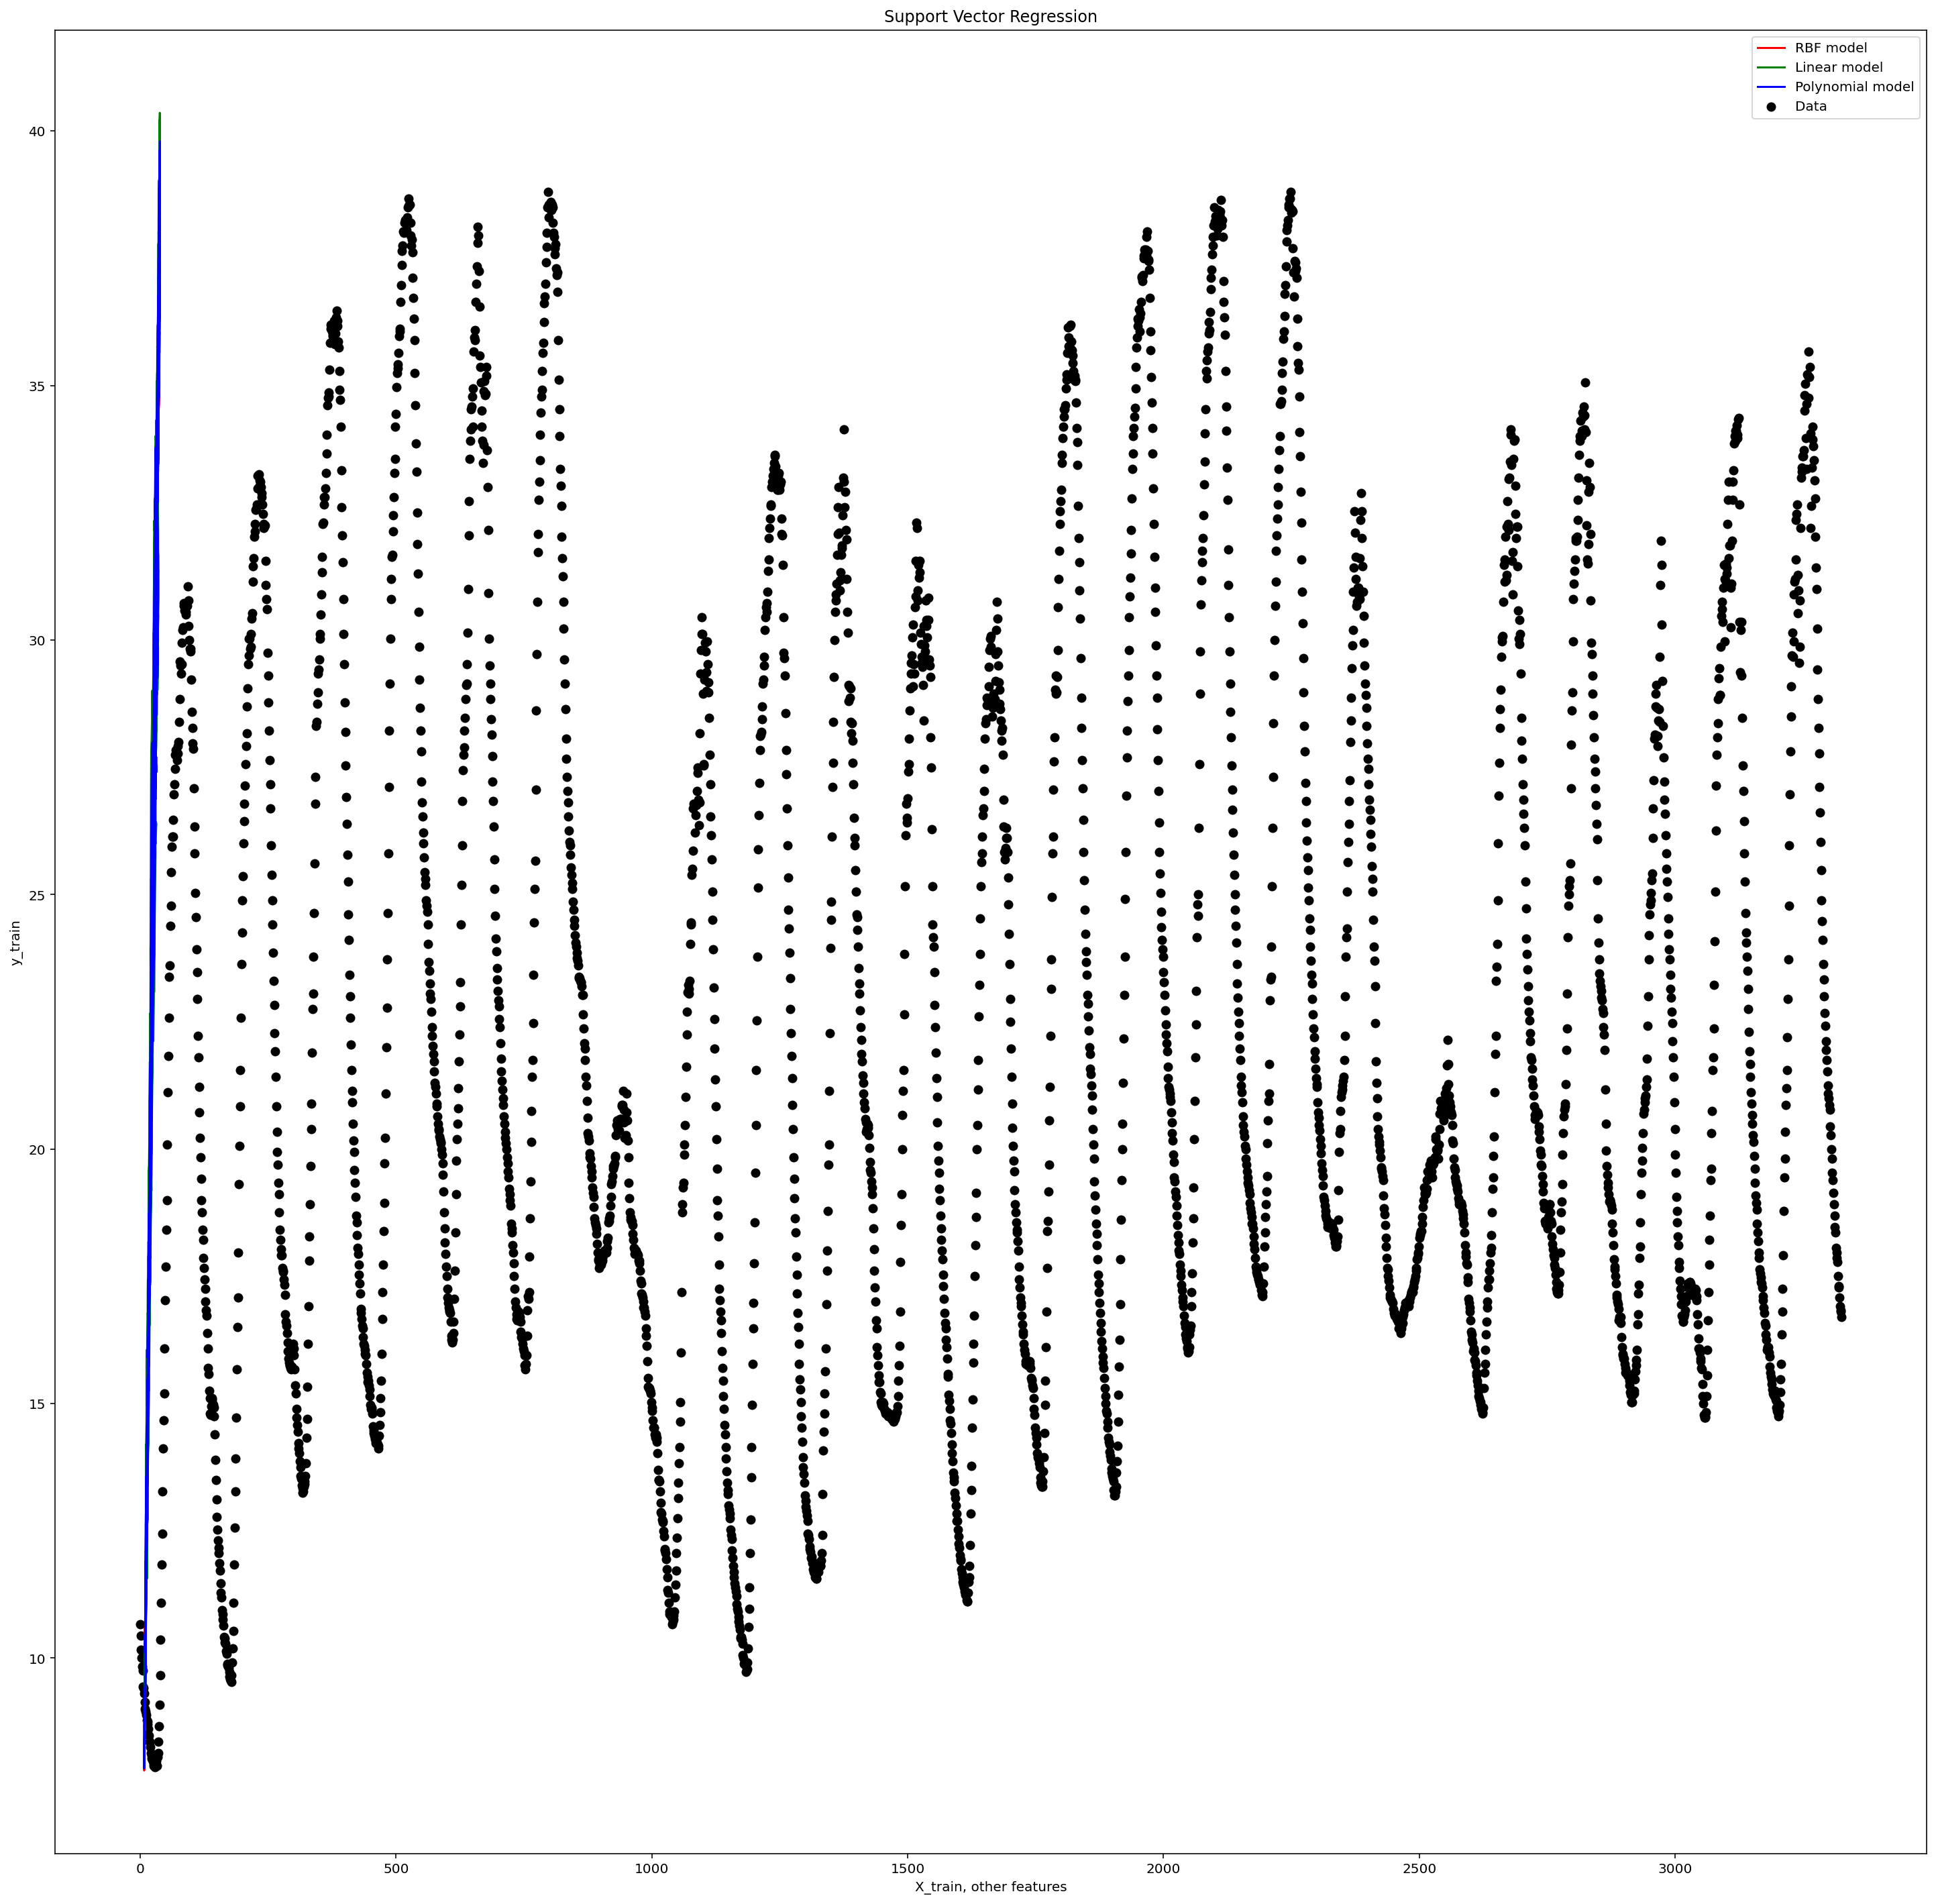

In [0]:
svr_rbf.fit(X_train,y_train)
svr_lin.fit(X_train,y_train)
svr_poly.fit(X_train,y_train)

plt.figure(figsize=(25,25))
plt.scatter(np.arange(len(X_train)), y_train, color= 'black', label= 'Data')
plt.plot(y_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(y_train, svr_lin.predict(X_train), color= 'green', label= 'Linear model') 
plt.plot(y_train, svr_poly.predict(X_train), color= 'blue', label= 'Polynomial model') 
plt.xlabel('X_train, other features')
plt.ylabel('y_train')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [0]:
svr_rbf_submission=pd.DataFrame(svr_rbf.predict(X_train))
svr_lin_submission=pd.DataFrame(svr_lin.predict(X_train))
svr_poly_submission=pd.DataFrame(svr_poly.predict(X_train))

In [0]:
test_np=np.array(test)

svr_rbf_submission=pd.DataFrame(svr_rbf.predict(test_np))
svr_lin_submission=pd.DataFrame(svr_lin.predict(test_np))
svr_poly_submission=pd.DataFrame(svr_poly.predict(test_np))

In [0]:
print(svr_rbf_submission.describe())
print(svr_lin_submission.describe())
print(svr_poly_submission.describe())

                  0
count  11520.000000
mean      21.852087
std        6.065416
min        8.400373
25%       17.303790
50%       20.980141
75%       26.223330
max       38.862867
                  0
count  11520.000000
mean      21.972503
std        5.836204
min        8.034301
25%       17.415326
50%       21.562014
75%       26.045711
max       38.550948
                  0
count  11520.000000
mean      22.164502
std        5.977306
min        8.606055
25%       17.595359
50%       21.441070
75%       26.379978
max       39.416965


In [0]:
svr_poly_submission.to_csv(root_dir+'svr_poly.csv')

# MODEL (PRACTICE)

In [0]:
temp = train["Y18"].isna()
null_index = temp[temp==True].index
train.loc[null_index, "Y18"] = train.loc[null_index, "Y00":"Y17"].mean(axis=1)
X_train = train.loc[:, "X00":"X39"]
y_train = train["Y18"]

In [0]:
xgb = XGBRegressor()
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)
xgb_pred=xgb_grid.predict(X_test)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed: 30.5min finished


In [0]:
xgb_grid.fit(X, y)
submission = xgb_grid.predict(test.loc[:,'X00':'X39'])
submission=pd.DataFrame(submission)
submission.to_csv('/gdrive/My Drive/농사직설/2020 AI Friends Season 1/xgb.csv')
submission.head()

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed: 17.2min finished


,0
0,4.044067
1,3.972296
2,3.961930
3,4.006865
4,3.726345


In [0]:
gbr = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [100,500,1000],
              'max_depth'    : [4,6,8] 
              }
gbr_grid = GridSearchCV(estimator=gbr, param_grid = parameters, cv = 2, n_jobs=-1)
gbr_grid.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...e,
                          

In [0]:
gbr_grid.fit(X, y)
submission = gbr_grid.predict(test.loc[:,'X00':'X39'])
submission=pd.DataFrame(submission)
submission.to_csv('/gdrive/My Drive/농사직설/2020 AI Friends Season 1/gbr.csv')
submission.head()

,0
0,4.185734
1,4.127676
2,4.149629
3,4.127075
4,4.130693


In [0]:
lgb = LGBMRegressor()

#######
boosting_type = ['gbdt','dart']
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
learning_rate = [0.01 * i for i in range(1,11)]
num_leaves = [int(i)+1 for i in np.linspace(10, 110, num=11)]
max_bin = [int(i) for i in np.linspace(2, 12, num=11)]
min_split_gain = [0.0, 0.01, 0.02]
colsample_bytree = [0.1 * i for i in range(1,11)]
random_state = 42

parameters = { boosting = boosting_type,
                       n_estimators = n_estimators,
                       learning_rate = learning_rate,
                       num_leaves = num_leaves,
                       max_bin = max_bin,
                       min_split_gain = min_split_gain,
                       colsample_bytree = colsample_bytree,
                       n_jobs = -1,
                       random_state = random_state }

lgb_grid = GridSearchCV(estimator=lgb, param_grid = parameters, cv = 5, n_jobs=-1)

lgb_grid.fit(X_train,y_train)
lgb_pred=lgb_grid.predict(X_test)

SyntaxError: ignored

ERROR! Session/line number was not unique in database. History logging moved to new session 67


In [0]:
lgb_grid.fit(X, y)
submission = lgb_grid.predict(test.loc[:,'X00':'X39'])
submission=pd.DataFrame(submission)
submission.to_csv('/gdrive/My Drive/농사직설/2020 AI Friends Season 1/lgb.csv')
submission.head()

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:  1.4min finished
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:  1.4min remaining:    0.0s


,0
0,3.774348
1,3.980036
2,3.916935
3,3.829017
4,3.568010


# TENSORFLOW 1.14.


In [0]:
!pip uninstall tensorflow

In [0]:
pip install tensorflow==1.14.